<a href="https://colab.research.google.com/github/rupaas/GEN_AI_2417/blob/main/GEN_AI_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.5451 - loss: 0.6871 - val_accuracy: 0.6000 - val_loss: 0.6822
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5456 - loss: 0.6882 - val_accuracy: 0.6000 - val_loss: 0.6822
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5433 - loss: 0.6857 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5312 - loss: 0.6875 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5416 - loss: 0.6864 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5321 - loss: 0.6859 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5451 - loss: 0.6864 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5578 - loss: 0.6825 - val_accuracy: 0.600

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Testing Accuracy: 0.6


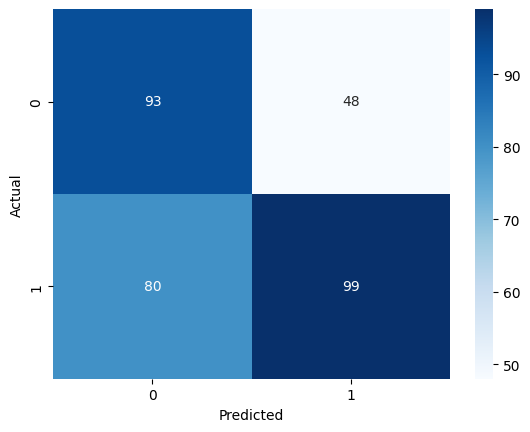

              precision    recall  f1-score   support

           0       0.54      0.66      0.59       141
           1       0.67      0.55      0.61       179

    accuracy                           0.60       320
   macro avg       0.61      0.61      0.60       320
weighted avg       0.61      0.60      0.60       320



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sample Prediction: Bad Quality


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data_url = "https://drive.google.com/uc?id=1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO"
df = pd.read_csv(data_url)

# Preprocessing
y = df['quality']
X = df.drop(columns=['quality'])
y = np.where(y >= 6, 1, 0)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Save model
model.save("wine_quality_model.h5")

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

# Deploy model
loaded_model = keras.models.load_model("wine_quality_model.h5")
def predict_wine_quality(sample):
    sample = scaler.transform([sample])
    prediction = loaded_model.predict(sample)
    return "Good Quality" if prediction > 0.5 else "Bad Quality"

# Example Prediction
sample_data = X_test[0]
print("Sample Prediction:", predict_wine_quality(sample_data))